# Homework 10

Implement 2 Laplacian Mask, Minimum Variance Laplacian, Laplacian of Gaussian, and Difference of Gaussian(inhibitory sigma=3, excitatory sigma=1, kernel size 11x11).

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def conv(a, b):    
    assert a.shape == b.shape
    res = 0
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            res += (a[i, j] * b[b.shape[0]-i-1, b.shape[1]-j-1])
    return res

In [3]:
def Laplacian(img, kernel, threshold):
    ri, ci = img.shape
    rk, ck = kernel.shape
    res = np.zeros((ri-rk+1, ci-ck+1))
    for i in range(res.shape[0]):
        for j in range(res.shape[1]):
            gradient = conv(img[i:i+rk, j:j+ck], kernel)
            if gradient >= threshold:
                res[i, j] = 1
            elif gradient <= -threshold:
                res[i, j] = -1
            else:
                res[i, j] = 0
    return res

In [4]:
def ZeroCrossingDetector(img, rk, ck):    
    ra, ca = img.shape
    res = np.full(img.shape, 255, dtype=int)   
    for i in range(ra):
        for j in range(ca):
            edge = 255
            if img[i, j] == 1:
                for ki in range(-rk//2+1, rk//2+1):
                    for kj in range(-ck//2+1, ck//2+1):
                        if  i+ki >= 0 and i+ki < ra and j+kj >= 0 and j+kj < ca:
                            if img[i+ki, j+kj] == -1:
                                edge = 0
            res[i, j] = edge
    return res

In [5]:
def show_result(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [6]:
img = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)

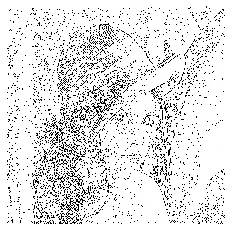

In [7]:
#Laplacian
ker1 = np.array([[0, 1, 0],
                 [1, -4, 1],
                 [0, 1, 0]])
cv2.imwrite('Laplacian1.jpg', ZeroCrossingDetector(Laplacian(img, ker1, 15), 3, 3))
Laplacian1 = cv2.imread('Laplacian1.jpg', cv2.IMREAD_GRAYSCALE)
show_result(Laplacian1)

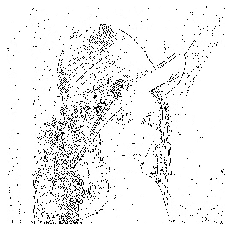

In [8]:
ker2 = np.array([[1, 1, 1],
                 [1, -8, 1],
                 [1, 1, 1]]) / 3
cv2.imwrite('Laplacian2.jpg', ZeroCrossingDetector(Laplacian(img, ker2, 15), 3, 3))
Laplacian2 = cv2.imread('Laplacian2.jpg', cv2.IMREAD_GRAYSCALE)
show_result(Laplacian2)

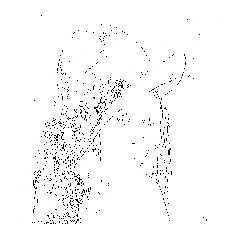

In [9]:
#Minimum variance Laplacian
ker3 = np.array([[2, -1, 2],
                 [-1, -4, -1],
                 [2, -1, 2]]) / 3
cv2.imwrite('MinVarLaplacian.jpg', ZeroCrossingDetector(Laplacian(img, ker3, 20), 3, 3))
MinVarLaplacian = cv2.imread('MinVarLaplacian.jpg', cv2.IMREAD_GRAYSCALE)
show_result(MinVarLaplacian)

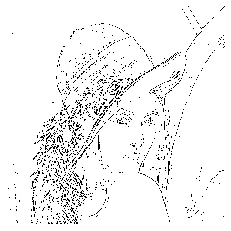

In [10]:
#Laplace of Gaussian
ker4 = np.array([[0, 0, 0, -1, -1, -2, -1, -1, 0, 0, 0],
                 [0, 0, -2, -4, -8, -9, -8, -4, -2, 0, 0],
                 [0, -2, -7, -15, -22, -23, -22, -15, -7, -2, 0],
                 [-1, -4, -15, -24, -14, -1, -14, -24, -15, -4, -1],
                 [-1, -8, -22, -14, 52, 103, 52, -14, -22, -8, -1],
                 [-2, -9, -23, -1, 103, 178, 103, -1, -23, -9, -2],
                 [-1, -8, -22, -14, 52, 103, 52, -14, -22, -8, -1],
                 [-1, -4, -15, -24, -14, -1, -14, -24, -15, -4, -1],
                 [0, -2, -7, -15, -22, -23, -22, -15, -7, -2, 0],
                 [0, 0, -2, -4, -8, -9, -8, -4, -2, 0, 0],
                 [0, 0, 0, -1, -1, -2, -1, -1, 0, 0, 0]])
cv2.imwrite('LoG.jpg', ZeroCrossingDetector(Laplacian(img, ker4, 3000), 3, 3))
LoG = cv2.imread('LoG.jpg', cv2.IMREAD_GRAYSCALE)
show_result(LoG)

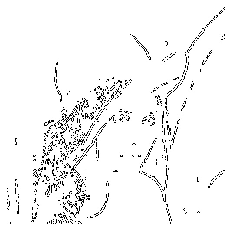

In [11]:
#Difference of Gaussian
ker5 = np.array([[-1, -3, -4, -6, -7, -8, -7, -6, -4, -3, -1],
            [-3, -5, -8, -11, -13, -13, -13, -11, -8, -5, -3],
            [-4, -8, -12, -16, -17, -17, -17, -16, -12, -8, -4],
            [-6, -11, -16, -16, 0, 15, 0, -16, -16, -11, -6],
            [-7, -13, -17, 0, 85, 160, 85, 0, -17, -13, -7],
            [-8, -13, -17, 15, 160, 283, 160, 15, -17, -13, -8],
            [-7, -13, -17, 0, 85, 160, 85, 0, -17, -13, -7],
            [-6, -11, -16, -16, 0, 15, 0, -16, -16, -11, -6],
            [-4, -8, -12, -16, -17, -17, -17, -16, -12, -8, -4],
            [-3, -5, -8, -11, -13, -13, -13, -11, -8, -5, -3],
            [-1, -3, -4, -6, -7, -8, -7, -6, -4, -3, -1]])
cv2.imwrite('DoG.jpg', ZeroCrossingDetector(Laplacian(img, ker5, 1), 3, 3))
DoG = cv2.imread('DoG.jpg', cv2.IMREAD_GRAYSCALE)
show_result(DoG)